# **Prediction of Key Health in Medical Students**
## **Introduction to Health Metrics Prediction Analysis**
This dataset contains 200,000 records of medical student health data, each featuring 13 attributes, including demographic details (age, gender), physiological measurements (height, weight, blood pressure, etc.), and lifestyle factors (smoking). The dataset is rich with both numeric and categorical data and presents some challenges, such as missing values in columns like 'Height' and 'Smoking' status.

Our objective is to predict important health metrics like BMI, Blood Pressure, and Cholesterol using regression and classification models. We will prepare the data by handling missing values, normalizing distributions, and encoding categorical variables, then train appropriate models to estimate these health metrics based on available features.

Dataset Source: https://www.kaggle.com/datasets/slmsshk/medical-students-dataset/data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AIG/ML_Project/medical_students_dataset.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [19]:
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [20]:
df.isnull().sum()

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


In [21]:
df.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,49974.042078,26.021561,174.947103,69.971585,23.338869,98.600948,79.503767,114.558033,184.486361
std,28879.641657,4.890528,14.447560,17.322574,7.033554,0.500530,11.540755,14.403353,37.559678
min,1.000000,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,24971.750000,22.000000,162.476110,54.969838,17.858396,98.264750,70.000000,102.000000,152.000000
50%,49943.500000,26.000000,174.899914,69.979384,22.671401,98.599654,80.000000,115.000000,184.000000
75%,74986.000000,30.000000,187.464417,84.980097,27.997487,98.940543,90.000000,127.000000,217.000000
max,100000.000000,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


In [22]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1 # Interquartile Range
    Lower_bound = Q1 - 1.5 * IQR
    Upper_bound = Q3 + 1.5 * IQR

    condition =(df[columns] >= Lower_bound & (df[columns] <= Upper_bound))


    df_clean = df[condition.all(axis=1)]
    return df_clean

outlier=df.select_dtypes(include=["int64","float64"]).columns
df1=remove_outliers(df,outlier)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


df.columns=df.columns.str.lower()
target='bmi'
df=df.dropna(subset=[target])
x=df.drop(target,axis=1)
y=df[target]

numeric_cols=x.select_dtypes(include=['int64','float64']).columns

nonimal_cols=x.select_dtypes(include="object").columns

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

numeric_transform=Pipeline([
    ('imputer',SimpleImputer(strategy="mean")),
    ('encoder',StandardScaler())
])

nominal_transforms=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

process_data=ColumnTransformer([
    ("numeric",numeric_transform,numeric_cols),
    ("norminal",nominal_transforms,nonimal_cols)

])

In [24]:
check=process_data.fit_transform(x_train)
columns=process_data.get_feature_names_out()
df1=pd.DataFrame(check,columns=columns)
df1.isnull().sum()

,0
numeric__student id,0
numeric__age,0
numeric__height,0
numeric__weight,0
numeric__temperature,0
numeric__heart rate,0
numeric__blood pressure,0
numeric__cholesterol,0
norminal__gender_Female,0
norminal__gender_Male,0


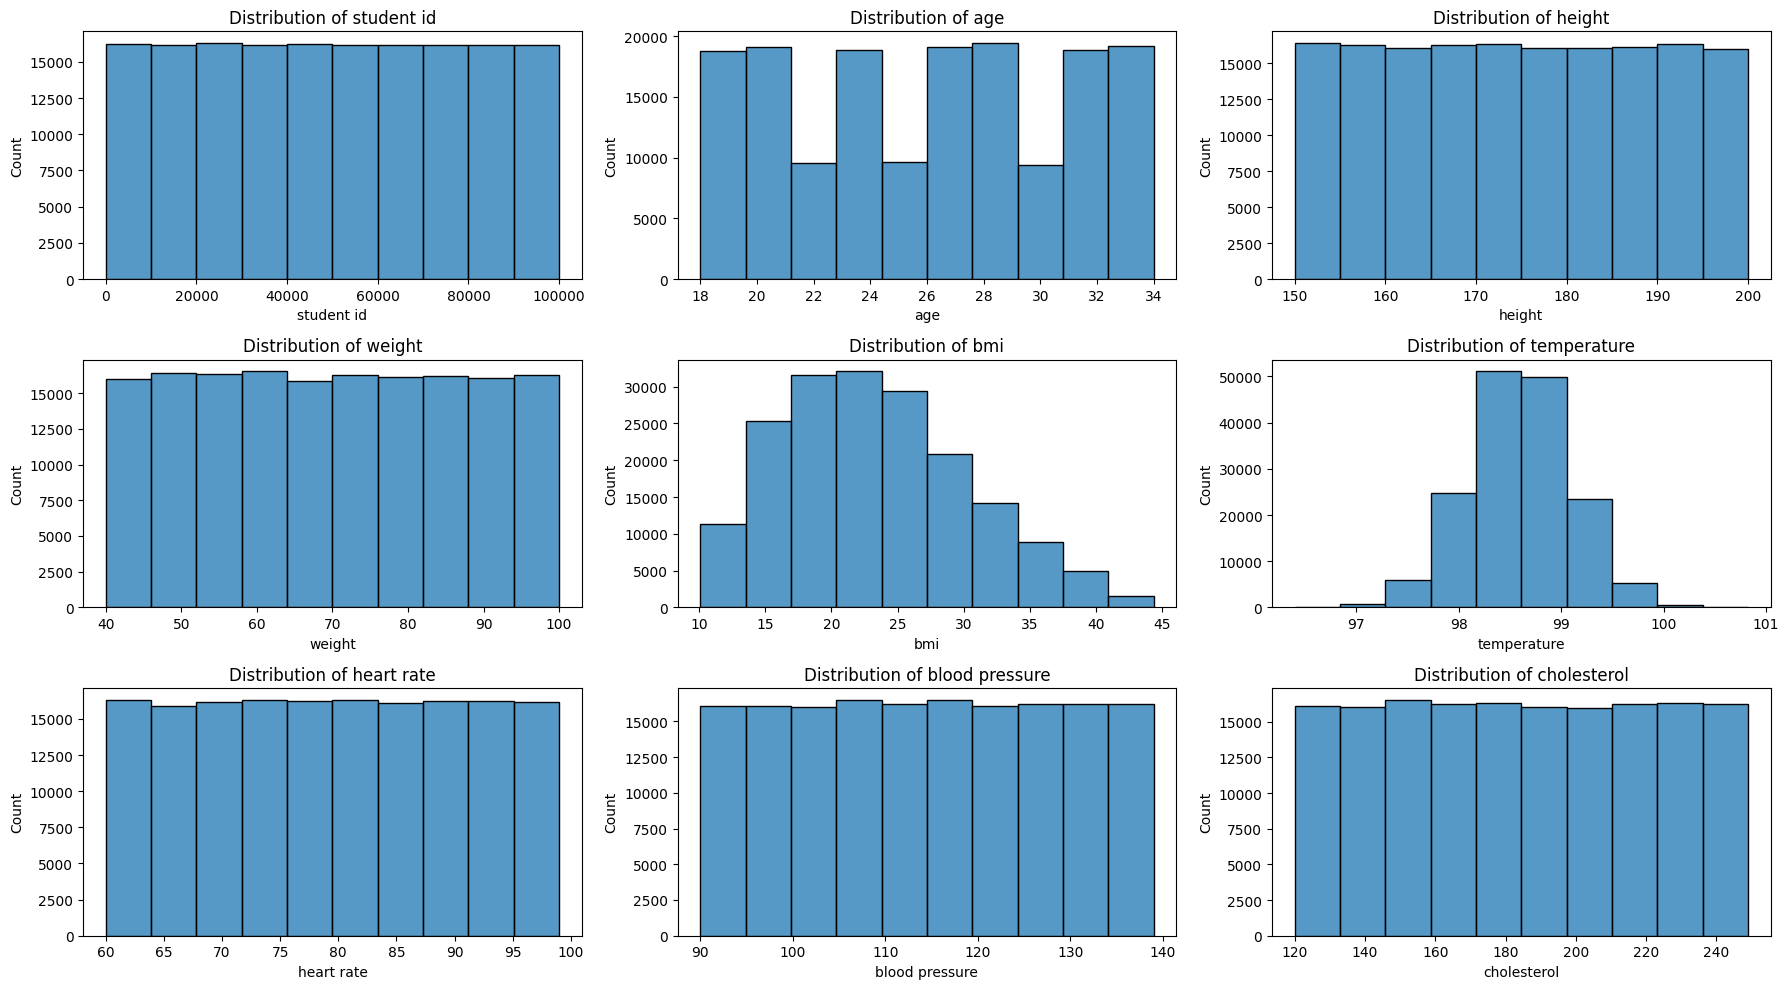

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for i, col in enumerate(numeric_cols):
    if i < 9:
      plt.subplot(3, 3, i + 1)
      sns.histplot(df[col], bins=10 ,edgecolor='black')
      plt.title(f'Distribution of {col}')
    else:
      break

plt.tight_layout()
plt.show()

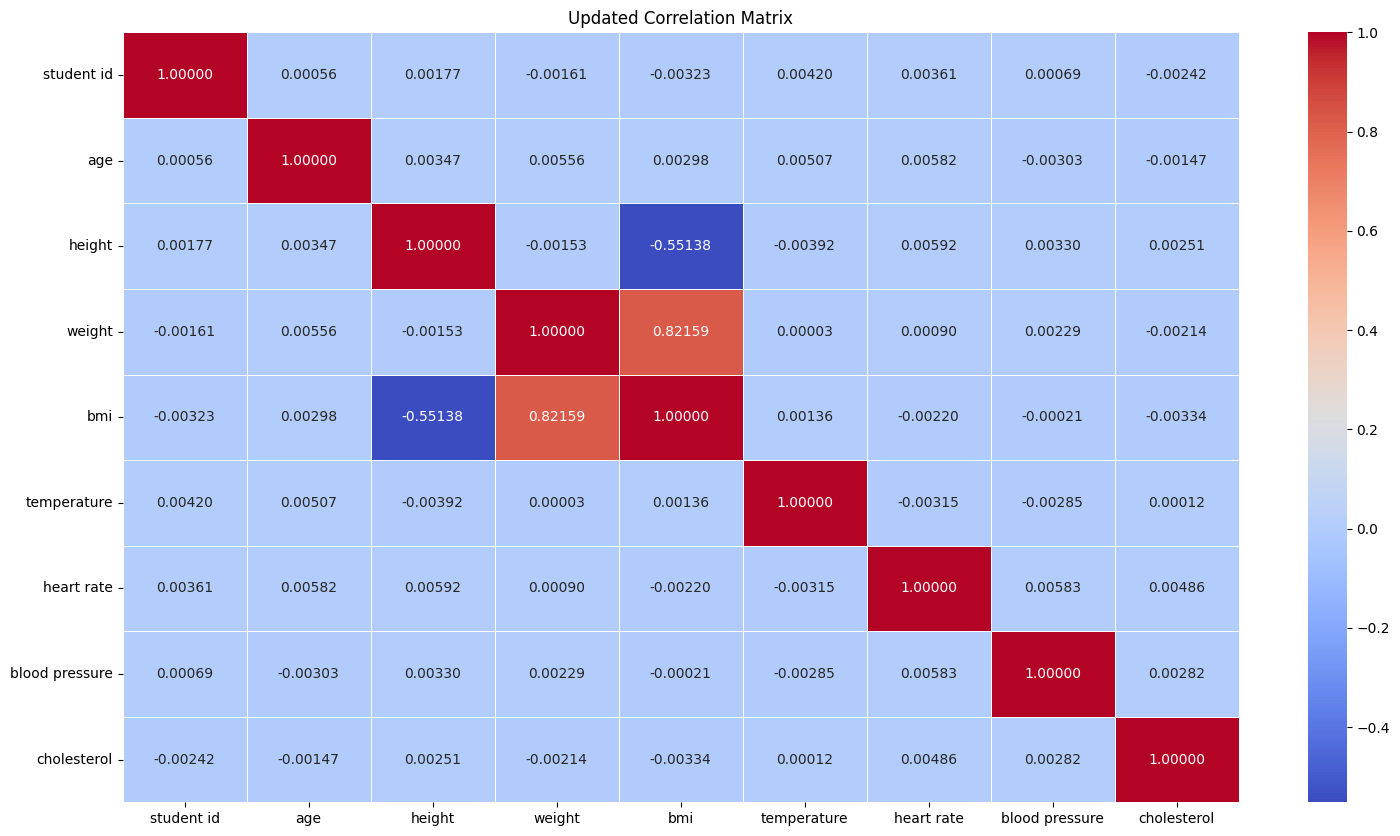

In [26]:
plt.figure(figsize=(18, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".5f", linewidths=0.5)
plt.title("Updated Correlation Matrix")
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_LinearRegression=Pipeline([
    ('process',process_data),
    ('model',LinearRegression())
])

model_DecisionTree=Pipeline([
    ('process',process_data),
    ('model',DecisionTreeRegressor(random_state=100))
])


In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model_LinearRegression.fit(x_train, y_train)
y_predict_LR = model_LinearRegression.predict(x_test)

model_DecisionTree.fit(x_train, y_train)
y_predict_DecisionTree = model_DecisionTree.predict(x_test)

print('--------------------------------------------------')
print("Metrics for Linear Regression:")
print('MAE',mean_absolute_error(y_test,y_predict_LR))
print('MSE',mean_squared_error(y_test,y_predict_LR))
print('R2',r2_score(y_test,y_predict_LR))
print('--------------------------------------------------')
print("Metrics for DecisionTree Regression:")
print('MAE',mean_absolute_error(y_test,y_predict_DecisionTree))
print('MSE',mean_squared_error(y_test,y_predict_DecisionTree))
print('R2',r2_score(y_test,y_predict_DecisionTree))
print('--------------------------------------------------')


--------------------------------------------------
Metrics for Linear Regression:
MAE 1.4802820505708305
MSE 5.912108201494602
R2 0.8807892371143511
--------------------------------------------------
Metrics for DecisionTree Regression:
MAE 1.1594160560296563
MSE 9.892970285101725
R2 0.8005197985730557
--------------------------------------------------


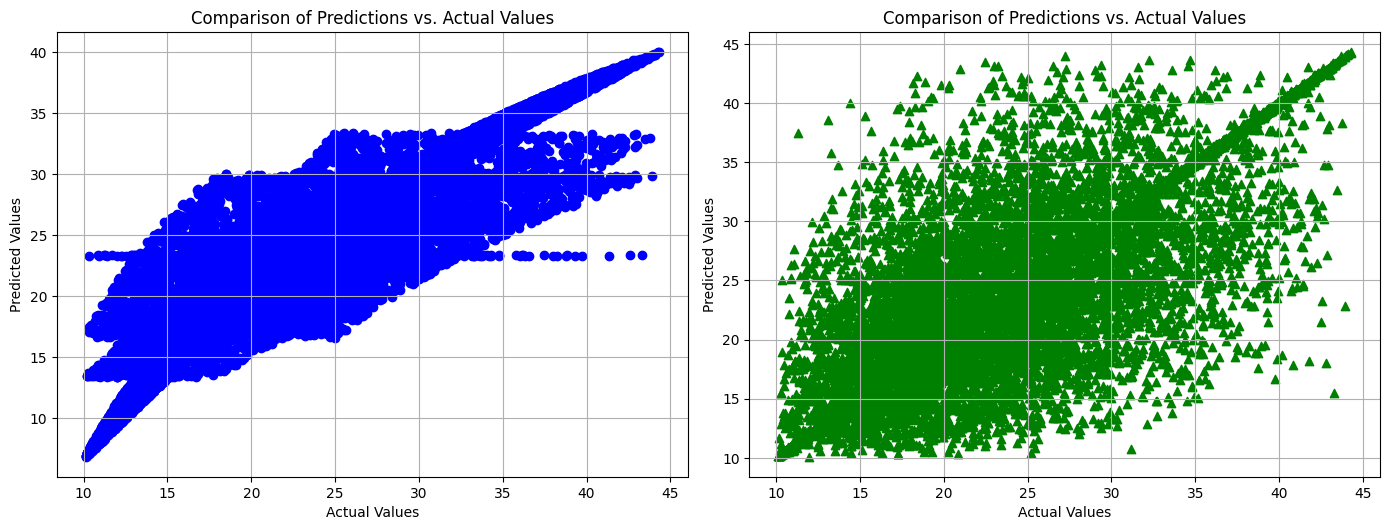

In [40]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)

# Scatter plot for Linear Regression
plt.scatter(y_test, y_predict_LR, marker='o',color='blue', label='Linear Regression')
plt.title('Comparison of Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Scatter plot for Decision Tree Regression
plt.subplot(2, 2, 2)

plt.scatter(y_test, y_predict_DecisionTree, marker='^',color='green', label='Decision Tree Regression')

plt.title('Comparison of Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.grid(True)

plt.tight_layout()
plt.show()



# Data Analysis Report: Prediction of Key Health in Medical Students
## **1. Introduction to Health Metrics Prediction Analysis**

This dataset contains 200,000 records of medical student health data, each featuring 13 attributes, including demographic details (age, gender), physiological measurements (height, weight, blood pressure, etc.), and lifestyle factors (smoking). The dataset is rich with both numeric and categorical data and presents some challenges, such as missing values in columns like 'Height' and 'Smoking' status.

Our objective is to predict important health metrics like BMI, Blood Pressure, and Cholesterol using regression and classification models. We will prepare the data by handling missing values, normalizing distributions, and encoding categorical variables, then train appropriate models to estimate these health metrics based on available features.

Dataset Source: https://www.kaggle.com/datasets/slmsshk/medical-students-dataset/data

## **2. Data Preprocessing**
Given the dataset's complexity and issues like missing data, preprocessing is crucial for accurate analysis:

**Handling Missing Values: **
We'll employ SimpleImputer from scikit-learn to fill missing values. For numerical data like height and weight, we'll use the mean value, and for categorical data like 'Smoking', we'll use the mode.

**Outlier Detection and Removal:**
Outliers can skew results significantly, especially in physiological data. We'll use the IQR (Interquartile Range) method to detect and remove outliers from columns such as 'Weight' and 'Cholesterol'.


## **3. Model Implementation**
We will implement two models to address different prediction tasks:

Linear Regression: Suitable for continuous outcomes such as predicting 'Cholesterol' levels. It assumes a linear relationship between the predictors and the outcome.

Decision Tree Regression: Useful for non-linear data structures and can be applied to predict both continuous variables like 'BMI' and categorical variables in a classification format (if modified).

## **4. Model Evaluation**
**Metrics for Linear Regression:**

Mean Absolute Error (MAE): 1.48 - Indicates a relatively low average absolute difference between observed actual outcomes and predictions, suggesting good model accuracy.

Mean Squared Error (MSE): 5.91 - Reflects the average squared differences between observed and predicted values, which is relatively low, indicating accurate predictions.

R-squared (R2): 0.88 - This suggests that 88% of the variance in the dependent variable is predictable from the independent variables, indicating a strong fit of the model to the data.

**Metrics for Decision Tree Regression:**

Mean Absolute Error (MAE): 1.16 - Even lower than Linear Regression, indicating more precise predictions from the Decision Tree model.

Mean Squared Error (MSE): 9.89 - Higher than the MSE for Linear Regression, suggesting that the Decision Tree model has more error variance in its predictions.

R-squared (R2): 0.80 - Lower than that of Linear Regression, indicating that while the Decision Tree model fits the data well, it does not capture as much variance as the Linear Regression model.

## **5. Results Interpretation**
The Linear Regression model shows excellent performance with a high R-squared value of 0.88, indicating that it can explain a significant portion of the variance in health metrics from the predictors used. Its low MAE and MSE further confirm its accuracy and reliability in predictions.

On the other hand, the Decision Tree Regression model, while having a lower MAE, indicating better average prediction accuracy in some aspects, has a higher MSE and lower R-squared compared to the Linear Regression model. This could suggest that while it may capture complex, nonlinear relationships better and thus make closer predictions sometimes, it is generally less consistent over all predicted values.

## **Conclusion**
The evaluation demonstrates that Linear Regression provides a more consistent and reliable model for predicting health metrics in this dataset, despite the slightly higher MAE. The high R2 value and lower MSE highlight its capability to predict with less error and more consistency across the board. Decision Tree Regression, although beneficial for specific predictions, may not provide as consistent results across diverse data points.

This corrected assessment provides a more nuanced understanding of the strengths and weaknesses of each model in context. It is crucial to choose a model based not only on these metrics but also considering the specific application and the importance of prediction consistency versus capturing complex patterns.

## **Reflection and Challenges Faced**
Missing Data: Addressing missing data was crucial, as incomplete records could introduce bias.

Model Selection: Choosing the right models that align with the data characteristics was critical for accurate predictions.